In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.DataFrame({
    "name": [
        "Human",
        "Human",
        "Naive Bayes",
        "Naive Bayes",
        "Naive Neural Network",
        "Naive Neural Network",
        "Naive LSTM",
        "Naive LSTM",
        "Context LSTM",
        "Context LSTM",
        "LSTM + Power",
        "LSTM + Power",
        "Context LSTM + Power",
        "Context LSTM + Power",
        "Context GRU",
        "Context GRU",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context GRU",
        "Bi-Directional Context GRU",
        "Bi-Directional LSTM + CNN",
        "Bi-Directional LSTM + CNN",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + Power",
    ],
    "who": [
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
    ],
    "f1-true": [
        0.0 , 0.0,
        0.79, 0.82,
        0.94, 0.94,
        0.93, 0.94,
        0.93, 0.94,
        0.96, 0.96,
        0.92, 0.95,
        0.95, 0.93,
        0.91, 0.93,
        0.94, 0.95,
        0.93, 0.92,
        0.94, 0.95,
        0.90, 0.95,
        0.94, 0.93,
    ],
    "f1-false": [
        0.0 , 0.22,
        0.18, 0.15,
        0.16, 0.13,
        0.12, 0.08,
        0.21, 0.19,
        0.00, 0.07,
        0.20, 0.14,
        0.18, 0.15,
        0.22, 0.16,
        0.17, 0.13,
        0.23, 0.16,
        0.21, 0.12,
        0.16, 0.12,
        0.21, 0.17,
    ],
    "f1-macro-average": [
        0.0 , 0.58,
        0.48, 0.48,
        0.54, 0.54,
        0.53, 0.51,
        0.57, 0.57,
        0.48, 0.51,
        0.56, 0.54,
        0.56, 0.54,
        0.57, 0.55,
        0.55, 0.54,
        0.58, 0.54,
        0.58, 0.53,
        0.53, 0.53,
        0.58, 0.55,
    ]
})

df

,name,who,f1-true,f1-false,f1-macro-average
0,Human,sender,0.00,0.00,0.00
1,Human,receiver,0.00,0.22,0.58
2,Naive Bayes,sender,0.79,0.18,0.48
3,Naive Bayes,receiver,0.82,0.15,0.48
4,Naive Neural Network,sender,0.94,0.16,0.54
5,Naive Neural Network,receiver,0.94,0.13,0.54
6,Naive LSTM,sender,0.93,0.12,0.53
7,Naive LSTM,receiver,0.94,0.08,0.51
8,Context LSTM,sender,0.93,0.21,0.57
9,Context LSTM,receiver,0.94,0.19,0.57


In [34]:
def barh_graph(df, title_add = "", figsize=(5,5), yoffset = 6.1):
    _, ax = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace=0.06, hspace=0.05)
    plt.suptitle(f"{title_add} f1-scores")
    for (i,who) in enumerate(["sender", "receiver"]):
        ax[0][i].set_title(who.capitalize())
        for (j,what) in enumerate(["false", "macro-average"]):
            ax[j][i].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
            ax[j][i].set_xticklabels([0, 0.2, 0.4, 0.6, 0.8, 1])
            if i > 0:
                ax[j][i].get_yaxis().set_visible(False)
                ax[j][i].annotate(what.capitalize(), xy=(1.0, yoffset), ha="left", va="center", rotation=-90)
            if j < 1:
                ax[j][i].get_xaxis().set_visible(False)

            df_temp = df[df["who"] == who].sort_index(ascending=False).set_index("name")[f"f1-{what}"]
            ax[j][i].barh(df_temp.index, df_temp)
            ax[j][i].set_xlim([0.0, 1.0])
            for (y,v) in enumerate(df_temp):
                ax[j][i].text(v + (0.01 * (-1 if j != 0 and v != 0 else 1)), y, f"{v:.3f}", ha=("right" if j != 0 and v != 0 else "left"), va="center", color=("white" if j != 0 and v != 0 else "black"))
    plt.show()

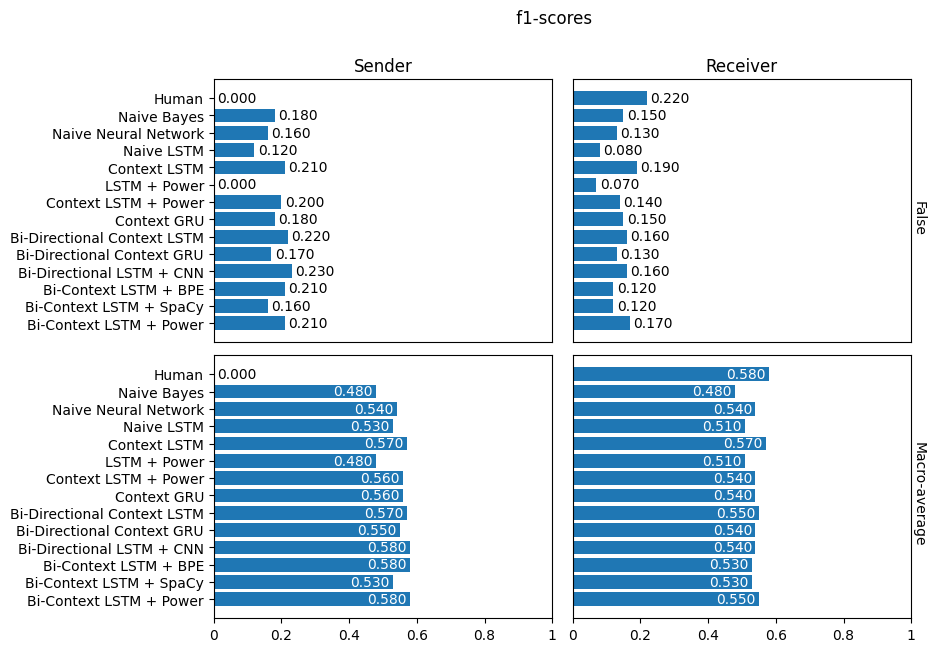

In [35]:
barh_graph(
    df,
    figsize=(9,7),
)

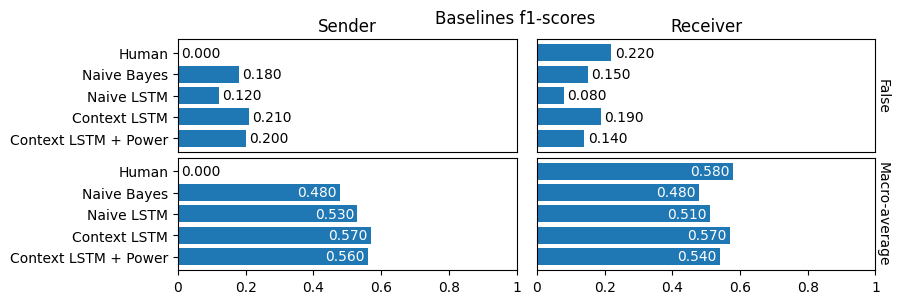

In [36]:
# Naive Bayes
# Human
# LSTM
# Context LSTM
# ConteztLSTM w power
barh_graph(
    df[df["name"].isin(["Human", "Naive Bayes", "Naive LSTM", "Context LSTM", "Context LSTM + Power"])],
    figsize=(9,3),
    title_add="Baselines",
    yoffset=2.0
)

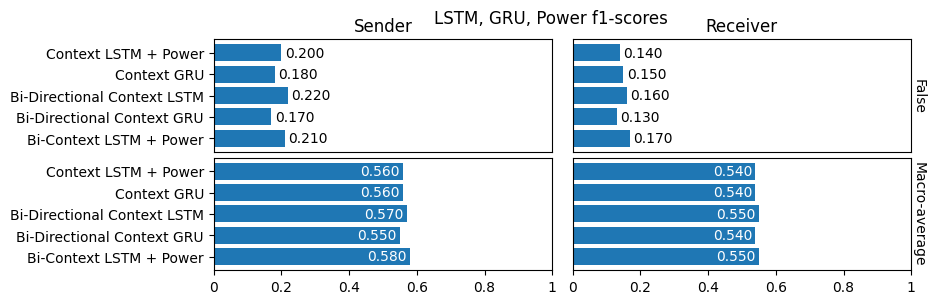

In [37]:
# Context LSTM w Power
# Bi Context LSTM
# Context GRU
# Bi Context GRU
# Bi Context LSTM w/ Power
barh_graph(
    df[df["name"].isin(["Context LSTM + Power", "Bi-Directional Context LSTM", "Context GRU", "Bi-Directional Context GRU", "Bi-Context LSTM + Power"])],
    figsize=(9,3),
    title_add="LSTM, GRU, Power",
    yoffset = 2.0
)

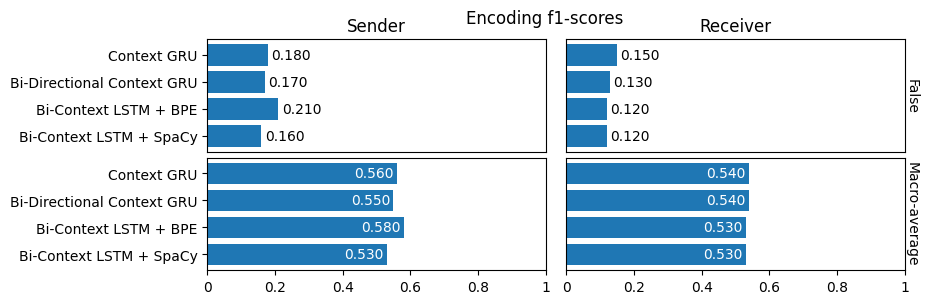

In [38]:
# Bi Context LSTM w/ Power + BPE
# Bi Context LSTM w/ Power + SpaCy
# Bi Context LSTM w/ Power + Unigram
# Bi Context LSTM w/ Power + all 3
barh_graph(
    df[df["name"].str.contains("BPE") | df["name"].str.contains("SpaCy") | df["name"].str.contains("GRU")],
    title_add = "Encoding",
    figsize=(9,3),
    yoffset=1.5
)

<hr />

In [39]:
df2 = pd.DataFrame({
    "name": [
        "Human",
        "Human",
        "Naive Bayes",
        "Naive Bayes",
        "Naive Neural Network",
        "Naive Neural Network",
        "Naive LSTM",
        "Naive LSTM",
        "Context LSTM",
        "Context LSTM",
        "LSTM + Power",
        "LSTM + Power",
        "Context LSTM + Power",
        "Context LSTM + Power",
        "Context GRU",
        "Context GRU",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context LSTM",
        "Bi-Directional Context GRU",
        "Bi-Directional Context GRU",
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + CNN",
        "Bi-Context LSTM + CNN",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + SpaCy",
        "Bi-Context LSTM + Unigram + Power",
        "Bi-Context LSTM + Unigram + Power",
        "Bi-Context LSTM + Unigram + CNN + Power",
        "Bi-Context LSTM + Unigram + CNN + Power",
        "Bi-Context LSTM + Unigram + CNN + Power + SpaCy",
        "Bi-Context LSTM + Unigram + CNN + Power + SpaCy",
    ],
    "who": [
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
        "sender", "receiver",
    ],
    "f1-true": [
        0.0 , 0.0,
        0.800, 0.826, # naive Bayes
        0.926, 0.908, # naive nn
        0.935, 0.901, # X naive LSTM
        0.930, 0.928, # X Context LSTM
        0.892, 0.956, # LSTM + Power
        0.914, 0.920, # X Context LSTM + Power
        0.937, 0.928, # Context GRU
        0.918, 0.941, # X Bi-Directional Context LSTM
        0.941, 0.942, # Bi-Directional Context GRU
        0.932, 0.931, # Bi-Context LSTM + Power
        0.937, 0.935, # Bi-Directional LSTM + CNN
        0.935, 0.868, # Bi-Context LSTM + BPE
        0.943, 0.946, # Bi-Context LSTM + SpaCy
        0.926, 0.915, # Bi-Context LSTM + Unigram + Power
        0.917, 0.946, # Bi-Context LSTM + Unigram + CNN + Power
        0.908, 0.929, # Bi-Context LSTM + Unigram + CNN + Power + SpaCy
    ],
    "f1-false": [
        0.225, 0.0,
        0.169, 0.147, # naive Bayes
        0.203, 0.134, # naive nn
        0.122, 0.113, # naive LSTM
        0.197, 0.171, # Context LSTM
        0.151, 0.072, # LSTM + Power
        0.239, 0.185, # Context LSTM + Power
        0.194, 0.158, # Context GRU
        0.197, 0.150, # Bi-Directional Context LSTM
        0.170, 0.135, # Bi-Directional Context GRU
        0.224, 0.164, # Bi-Context LSTM + Power
        0.225, 0.157, # Bi-Directional LSTM + CNN
        0.107, 0.155, # Bi-Context LSTM + BPE
        0.170, 0.137, # Bi-Context LSTM + SpaCy
        0.245, 0.147, # Bi-Context LSTM + Unigram + Power
        0.273, 0.137, # Bi-Context LSTM + Unigram + CNN + Power
        0.170, 0.079, # Bi-Context LSTM + Unigram + CNN + Power + SpaCy
    ],
    "f1-macro-average": [
        0.581, 0.0 ,
        0.484, 0.486, # naive bayes
        0.564, 0.521, # naive nn
        0.529, 0.507, # naive LSTM
        0.564, 0.549, # Context LSTM
        0.522, 0.514, # LSTM + Power
        0.577, 0.552, # Context LSTM + Power
        0.565, 0.543, # Context GRU
        0.558, 0.546, # Bi-Directional Context LSTM
        0.555, 0.538, # Bi-Directional Context GRU
        0.578, 0.547, # Bi-Context LSTM + Power
        0.581, 0.546, # Bi-Directional LSTM + CNN
        0.521, 0.511, # Bi-Context LSTM + BPE
        0.556, 0.541, # Bi-Context LSTM + SpaCy
        0.586, 0.531, # Bi-Context LSTM + Unigram + Power
        0.595, 0.541, # Bi-Context LSTM + Unigram + CNN + Power
        0.539, 0.504, # Bi-Context LSTM + Unigram + CNN + Power + SpaCy
    ]
})

df

,name,who,f1-true,f1-false,f1-macro-average
0,Human,sender,0.00,0.00,0.00
1,Human,receiver,0.00,0.22,0.58
2,Naive Bayes,sender,0.79,0.18,0.48
3,Naive Bayes,receiver,0.82,0.15,0.48
4,Naive Neural Network,sender,0.94,0.16,0.54
5,Naive Neural Network,receiver,0.94,0.13,0.54
6,Naive LSTM,sender,0.93,0.12,0.53
7,Naive LSTM,receiver,0.94,0.08,0.51
8,Context LSTM,sender,0.93,0.21,0.57
9,Context LSTM,receiver,0.94,0.19,0.57


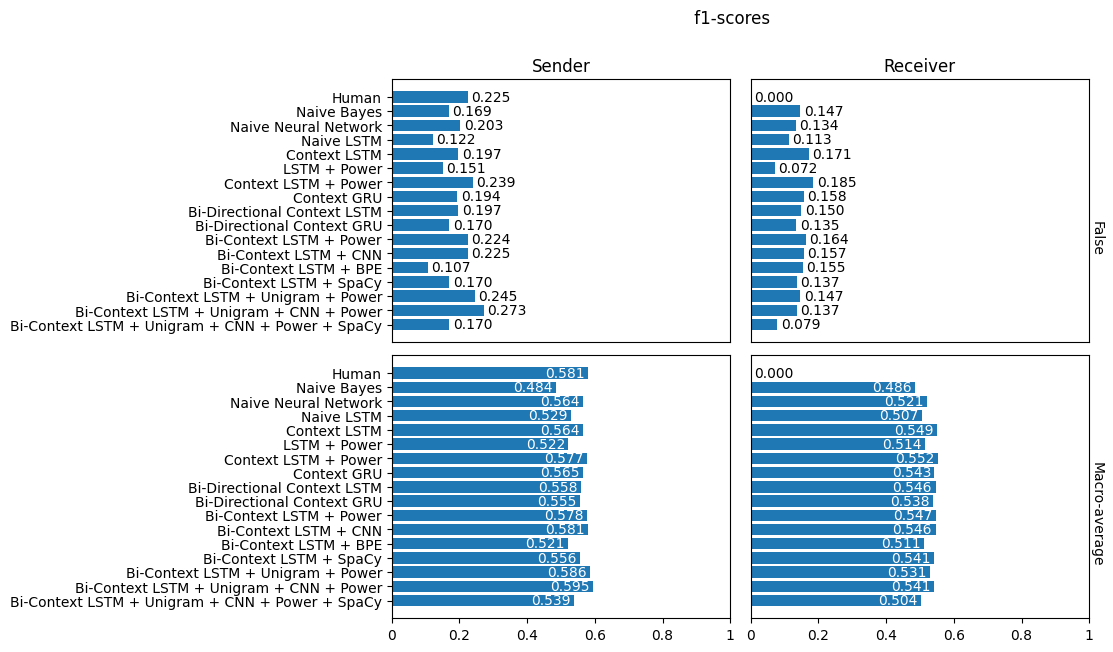

In [40]:
barh_graph(
    df2,
    figsize=(9,7),
)

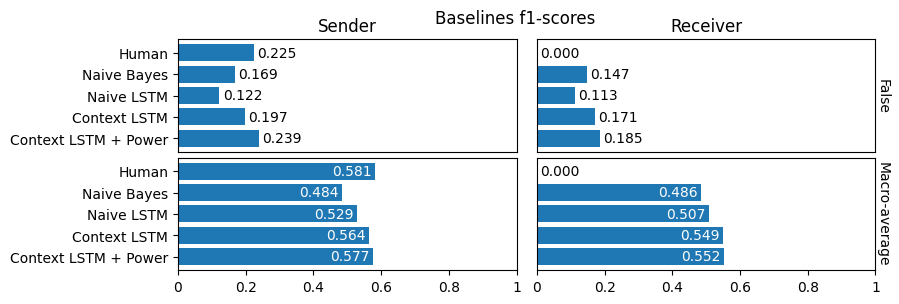

In [41]:
# Naive Bayes
# Human
# LSTM
# Context LSTM
# ConteztLSTM w power
barh_graph(
    df2[df2["name"].isin(["Human", "Naive Bayes", "Naive LSTM", "Context LSTM", "Context LSTM + Power"])],
    figsize=(9,3),
    title_add="Baselines",
    yoffset=2.0
)

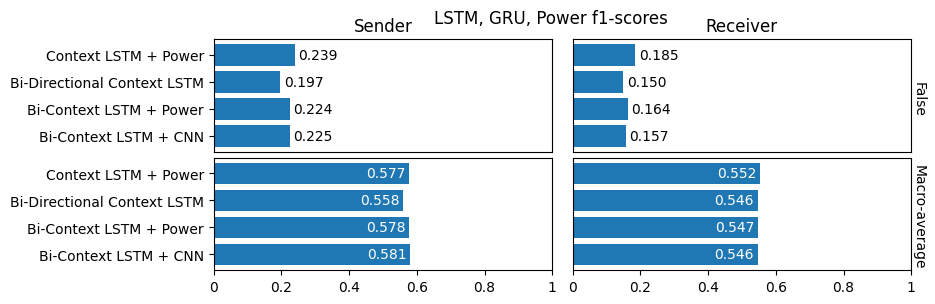

In [47]:
# Context LSTM w Power
# Bi Context LSTM
# Context GRU
# Bi Context GRU
# Bi Context LSTM w/ Power
barh_graph(
    df2[df2["name"].isin([
        "Context LSTM + Power",
        "Bi-Directional Context LSTM",
        "Bi-Context LSTM + CNN",
        "Bi-Context LSTM + Power"])],
    figsize=(9,3),
    title_add="LSTM, GRU, Power",
    yoffset = 1.4
)

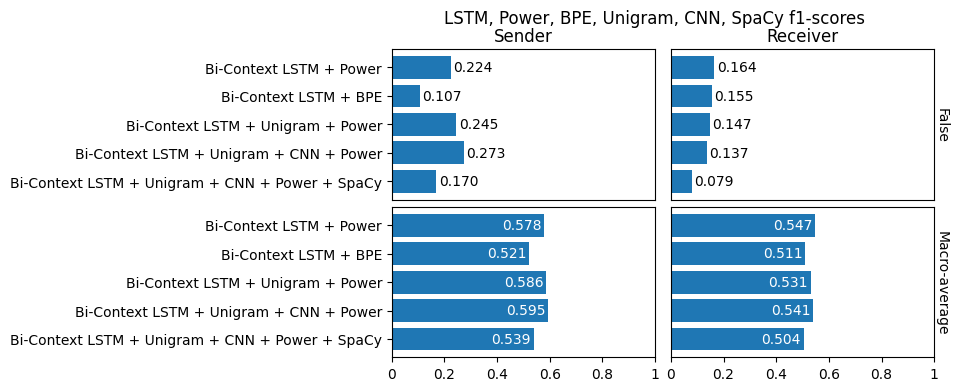

In [43]:
# bidirectional context LSTM plus power, 
# bidirectional context lstm with bpe encodings,
# bidirectional context lstm with unigram encodings and power,
# bidirectional context lstm with unigram encodings,
# power and CNN layer and bidirectional context lstm with unigram encodings,
# power and CNN layer with spacy
barh_graph(
    df2[df2["name"].isin([
        "Bi-Context LSTM + Power",
        "Bi-Context LSTM + BPE",
        "Bi-Context LSTM + Unigram + Power",
        "Bi-Context LSTM + Unigram",
        "Bi-Context LSTM + Unigram + CNN + Power",
        "Bi-Context LSTM + Unigram + CNN + Power + SpaCy"
    ])],
    figsize=(7,4),
    title_add="LSTM, Power, BPE, Unigram, CNN, SpaCy",
    yoffset = 2.0
)